In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [34]:
#https://www.fisicalab.com/ejercicio/657

In [126]:
# Radio
r = 2 # m

# Periodo
T = 20 # s

In [127]:
# Velocidad Angular 
w = 2 * np.pi / T # rad / s
print(np.around(w, 2),"rad/s")

# Velocidad Linear
v = w * r # m/s
print(np.around(v, 2),"m/s")

0.31 rad/s
0.63 m/s


$$ \theta (t)=\omega t+\theta _{0} $$

In [128]:
# angulo
#t = 120 # s 
#th_0 = 0
#th = w * t + th_0 # rad
#print(np.around(th, 2),"rad")

# Espacio recorrido
#s = th * r
#print(np.around(s, 2),"m")

In [135]:
# ahora con vals diferentes

# angulo
t = np.linspace(0, 2.*np.pi, 100) # s
th = 0
th = w * t + th_0 # rad


In [136]:
x = r * np.cos( th )
y = r * np.sin( th )

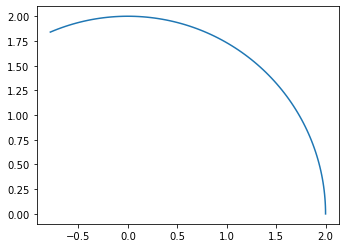

In [137]:

figure, axes = plt.subplots( 1 )
 
axes.plot( x, y )
axes.set_aspect( 1 )
 
plt.show()

In [2]:
T_terre = 365.256 # jours
R_s_t = 1 # UA
T_mars = 686.885 #jours
R_s_m = 1.52371 # UA

In [3]:
w_t = 2 * np.pi / T_terre # rad / s
print("w_terre",np.around(w_t, 2),"rad/s")

w_m = 2 * np.pi / T_mars # rad / s
print("w_mars",np.around(w_m, 2),"rad/s")

w_terre 0.02 rad/s
w_mars 0.01 rad/s


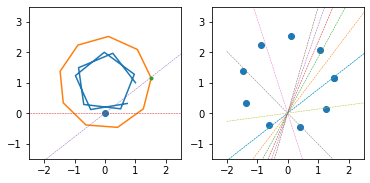

In [211]:
# we consider the period of mars
t = np.linspace(0, T_mars, 10) # s
th_0_t = 0
th_0_m = .1

th_t = w_t * t + th_0_t # rad
th_m = w_m * t + th_0_m # rad

x_t = R_s_t * np.cos( th_t )
y_t = R_s_t * np.sin( th_t ) + 1

x_m = R_s_m * np.cos( th_m )
y_m = R_s_m * np.sin( th_m ) + 1

#p1 = np.array([0,0])
#p2 = np.array([1.5,1])

#ang = np.arctan2(1, 1.5 ) # * ( 180 / np.pi) 
#line_x = np.arange(0, 2, .1)
#line_y = line_x * ang

lines = list()
degs = list()

for i,lx in enumerate(x_m):
    ly = y_m[i]
    deg = np.arctan2(ly, lx)
    line_x = np.arange(-2, 3, .1)
    line_y = line_x * (deg * 1.2)
    degs.append(deg)
    lines.append([line_x,line_y])
    
xx_range = [-2.5, 2.5]
yy_range = [-1.5, 3.5]

fig, (ax,ax1) = plt.subplots( 1,2 ) 

ax.plot( x_t, y_t , label="earth")
ax.plot( x_m, y_m , label="mars" )

# Testing with some points
ax.scatter(0,0)
ax.plot(x_m[0], y_m[0], '.')
#ax.scatter(x_m[1],y_m[1] , c="red")

# Horizontal line
hor_x = np.arange(-3, 3, .1)
hor_y = np.zeros(hor_x.shape)
ax.plot(hor_x,hor_y,'--',linewidth = .5)

# Plotting lines
ax.plot(lines[0][0],lines[0][1], '--',linewidth = .5)

# Defining viewport limits
ax.set_xlim(*xx_range)
ax.set_ylim(*yy_range)


#ax1.scatter( x_t, y_t )
ax1.scatter( x_m, y_m )

for l in lines:
    lx = l[0]
    ly = l[1]
    ax1.plot(lx,ly, '--',linewidth = .5) 

ax1.set_xlim(*xx_range)
ax1.set_ylim(*yy_range)


ax.set_aspect( 1 )
ax1.set_aspect( 1 )

#ax.legend()
plt.show()

In [286]:
def plot_planet(ax, x_t, y_t, x_t_0, y_t_0, x_m, y_m, x_m_0, y_m_0 ):
    xx_range = [-2, 2]
    yy_range = [-2, 3]
    
    ax.scatter(0,0, c="orange",s=100)
    
    ax.plot( x_t, y_t , label="earth", c="blue")
    ax.plot(x_t_0,y_t_0, 'o', c="blue")
    
    ax.plot( x_m, y_m , label="mars", c="red")
    ax.plot(x_m_0,y_m_0, 'o', c="red")

    # Defining viewport limits
    ax.set_xlim(*xx_range)
    ax.set_ylim(*yy_range)
    
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    
    ax.grid(True)

    ax.set_aspect( 1 )

In [287]:
def angle_between(p1, p2):
    ang1 = np.arctan2(*p1[::-1])
    ang2 = np.arctan2(*p2[::-1])
    return np.rad2deg((ang1 - ang2) % (2 * np.pi))

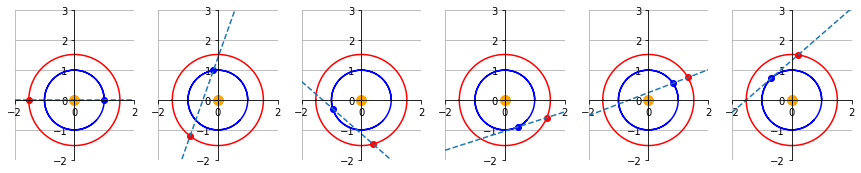

In [378]:
# we consider the period of mars
t = np.linspace(0, T_mars, 100) # s

fig, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots( 1,6, figsize=(15,15) ) 

th_0_t = 2 * np.pi
th_0_m = np.pi

g_times = list()
g_pos_x = list()
g_pos_y = list()
slopes = list()
phiss = list()

for i in range(0,700,1):
    #print("for i=" + str(i))
        
    th_t = w_t * t + th_0_t # rad
    th_m = w_m * t + th_0_m # rad

    x_t = R_s_t * np.cos( th_t ) 
    y_t = R_s_t * np.sin( th_t ) #+ 1
    
    x_t_0 = R_s_t * np.cos( w_t * np.array([i]) + th_0_t )
    y_t_0 = R_s_t * np.sin( w_t * np.array([i]) + th_0_t ) #+ 1

    x_m = R_s_m * np.cos( th_m )
    y_m = R_s_m * np.sin( th_m ) #+ 1
    
    x_m_0 = R_s_m * np.cos( w_m * np.array([i]) + th_0_m )
    y_m_0 = R_s_m * np.sin( w_m * np.array([i]) + th_0_m ) #+ 1
    
    #angle_deg = angle_between(np.array([x_t_0,y_t_0]), np.array([x_m_0,y_m_0]))
    #print(angle_deg,np.deg2rad(angle_deg))
    
    point1 = np.array([x_t_0,y_t_0])
    point2 = np.array([x_m_0,y_m_0])
    
    # slope
    slope = (point2[1] - point1[1]) / (point2[0] - point1[0])
    line_x = np.arange(-2, 3, .1)
    
    # Find the y-intercept
    b = point2[1] - ( point2[0] * slope)
    
    # Linear equation y = xm + b
    line_y = line_x * slope + b
    
    phii = np.arctan2((y_m_0 - y_t_0),(x_m_0 - x_t_0))
    
    g_times.append(i)
    g_pos_x.append(x_m_0)
    g_pos_y.append(y_m_0)
    slopes.append(slope)

    if i == 0:
        plot_planet(ax1,x_t,y_t, x_t_0, y_t_0, x_m, y_m, x_m_0, y_m_0 )
        ax1.plot(line_x,line_y, "--")

    if i == 100:
        plot_planet(ax2,x_t,y_t, x_t_0, y_t_0, x_m, y_m, x_m_0, y_m_0)
        ax2.plot(line_x,line_y,"--")

    if i == 200:
        plot_planet(ax3,x_t,y_t, x_t_0, y_t_0, x_m, y_m, x_m_0, y_m_0)
        ax3.plot(line_x,line_y,"--")

    if i == 300:
        plot_planet(ax4,x_t,y_t, x_t_0, y_t_0, x_m, y_m, x_m_0, y_m_0)
        ax4.plot(line_x,line_y,"--")

    if i == 400:
        plot_planet(ax5,x_t,y_t, x_t_0, y_t_0, x_m, y_m, x_m_0, y_m_0)
        ax5.plot(line_x,line_y,"--")

    if i == 500:
        plot_planet(ax6,x_t,y_t, x_t_0, y_t_0, x_m, y_m, x_m_0, y_m_0)
        ax6.plot(line_x,line_y,"--")

plt.show()

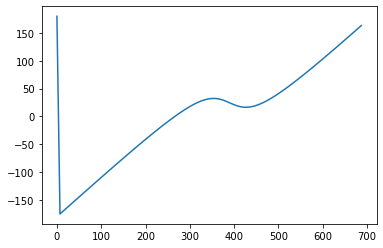

In [384]:
th_t = w_t * t + th_0_t# rad
th_m = w_m * t + th_0_m # rad

x_t = R_s_t * np.cos( th_t ) 
y_t = R_s_t * np.sin( th_t )

x_m = R_s_m * np.cos( th_m )
y_m = R_s_m * np.sin( th_m )

phi = np.rad2deg(np.arctan2((y_m - y_t),(x_m - x_t)))

plt.plot(t,phi)

In [383]:
t.shape

(100,)

In [1]:
def helperrr():    
    #Importation de nos divers modules
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    import math as mt
    from math import cos
    from math import sin
    from math import atan2
    from math import pi
    from datetime import datetime
    import time

    "Modèle du mouvement circulaire uniforme de la Terre et de Mars dans le référentiel héliocentrique"

    # Données de l'énoncé
    rayon_orbitalTerre=1.496e11 #m (1*UA)
    rayon_orbitalMars=2.279438e11 #m(1.52371*UA)
    Trevolution_Terre=31558118.4 #s(60*60*24*365.256)
    Trevolution_Mars= 59346864 #s(60*60*24*686.885)

    t0=0 ; tf=26374118.4 ; pas=86400 ; intervalle = tf - t0
    num_points = int(intervalle / pas) + 1 # nombre d'éléments
    t = np.linspace(t0, tf, num_points)

    #t_modèle=26373254400 #s (nombre de secondes du 2016/01/01 au 2016/11/01)

    # Vitesses angulaires de le Terre et de Mars
    wTerre=2*np.pi/Trevolution_Terre #rad/s
    wMars=2*np.pi/Trevolution_Mars #rad/s
    phi_0x=2*np.pi
    phi_0y=np.pi

    # Coordonnées de la Terre dans le référentiel héliocentrique
    xTerre=rayon_orbitalTerre*np.cos(wTerre*t +phi_0x)
    yTerre=rayon_orbitalTerre*np.sin(wMars*t +phi_0y)

    # Coordonnées de Mars dans le référentiel héliocentrique
    xMars=rayon_orbitalMars*np.cos(wTerre*t +phi_0x)
    yMars=rayon_orbitalMars*np.sin(wMars*t +phi_0y)


    # Expression de phi_apparent
    phi_apparent=np.arctan2((yMars-yTerre),(xMars-xTerre))
    plt.plot(t, phi_apparent, label = 'model')

    print(type(phi_apparent))
    print(type(t))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


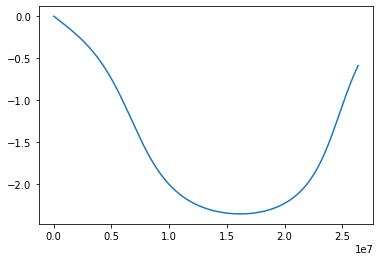

In [2]:
helperrr()